<a href="https://colab.research.google.com/github/pushkal1234/Case-studies/blob/main/PlaystoreAnalysis_Python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Project On Playstore Analysis

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving play1.csv to play1.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "play1.csv" with length 1272190 bytes


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt

In [ ]:
uploaded

{'play1.csv': b'App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver\r\nPhoto Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up\r\nColoring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up\r\n"U Launcher Lite \xe2\x80\x93 FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up\r\nSketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up\r\nPixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up\r\nPaper flowers instructions,ART_AND_DESIGN,4.4,167,5600,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up\r\nSmoke Effect Photo Mak

In [ ]:
df=pd.read_csv('play1.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# **TASKS**
# 1. Data clean up – Missing value treatment
# a. Drop records where rating is missing since rating is our target/study variable

In [ ]:
df.dropna(subset=['Rating'], inplace=True)

In [ ]:
df ['Rating'].isnull().sum()

0

# b. Check the null values for the Android Ver column.
# i. Are all 3 records having the same problem?
# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [ ]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [ ]:
df.drop(10472, axis=0, inplace=True )

In [ ]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


# iii. Replace remaining missing values with the mode

In [ ]:
df['Android Ver'].mode()[0]

'4.1 and up'

In [ ]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver       9366
dtype: int64

# c. Current ver – replace with most common value

In [ ]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,6-Jun-18,NaN,None
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,12-Feb-13,NaN,None
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,10-May-17,NaN,None
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,18-Apr-18,NaN,None


In [ ]:
df['Current Ver'].mode()[0]

'Varies with device'

In [ ]:
df['Current Ver']=df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       9366
Android Ver       9366
dtype: int64

# 2. Data clean up – correcting the data types
# a. Which all variables need to be brought to numeric types?

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Installs, Reviews and Price must be numeric
# b. Price variable – remove dollar sign and convert to ﬂoat.

In [ ]:
df['Price']= df.Price.str.replace('$',' ').astype(float)

In [ ]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [ ]:
df['Installs']=df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

In [ ]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

# d. Convert all other identified columns to numeric

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# So now we have to convert Reviews to numeric

In [ ]:
df['Reviews']=df['Reviews'].astype(int)

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly
# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
# i. Are there any such records? Drop if so.

In [ ]:
df[(df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df[(df['Rating']<1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records to drop

# b. Reviews should not be more than installs as only those who installed can review the app.
# i. Are there any such records? Drop if so.

In [ ]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,2-Aug-18,None,None
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,None,None
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,8-Feb-17,None,None
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,23-Jul-18,None,None
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,11-Mar-17,None,None
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,23-Jul-18,None,None
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,3-Mar-17,None,None


# There are 7 records where Reviews are greater than Installs, So dropping them.

In [ ]:
index=df[df.Reviews>df.Installs].index
df.drop(labels=index, inplace=True)

In [ ]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Dropped 7 records

# 4. Identify and handle outliers –
# a. Price column
# i. Make suitable plot to identify outliers in price

In [ ]:
4. Identify and handle outliers –
a. Price column
i. Make suitable plot to identify outliers in price

SyntaxError: ignored

# ii. Do you expect apps on the play store to cost 200 dollar? Check out these cases

In [ ]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,None,None
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,None,None
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,None,None
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,None,None
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,None,None
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,None,None
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,None,None
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,1-Jul-18,None,None
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,None,None
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,1-May-17,None,None


In [ ]:
df.drop(df[df.Price>200].index,inplace=True)

In [ ]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# iii. After dropping the useless records, make the suitable plot again to identify outliers

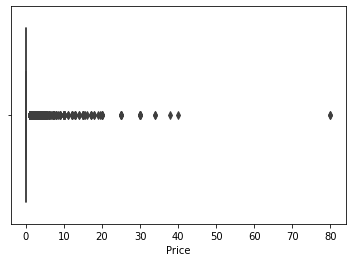

In [ ]:
sn.boxplot(data=df, x='Price')

# iv. Limit data to records with price < 30 dollar

In [ ]:
df.drop(df[df.Price>30].index, inplace=True)

In [ ]:
df[df.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# b. Reviews column
# i. Make suitable plot

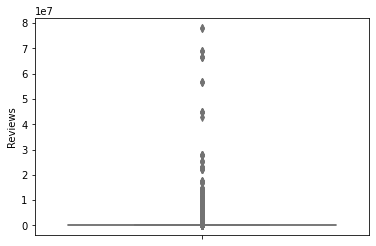

In [ ]:
sn.boxplot(y='Reviews',data=df,palette='rainbow',orient="v")
plt.show()

# ii. Limit data to apps with < 1 Million reviews

In [ ]:
df.drop(df[df.Reviews>1000000].index, inplace=True)

In [ ]:
df[df.Reviews>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# As there are no records greater than 1M apps are limited to less than 1M reviews

# c. Installs
# i. What is the 95th percentile of the installs?

In [ ]:
Percentile = df.Installs.quantile(0.95)

In [ ]:
print(Percentile)

10000000.0


# 100000.0 value is 95th percentile
# ii. Drop records having a value more than the 95th percentile

In [ ]:
df[df.Installs>1000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,None,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,None,None
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000.00000,10000000,Free,0.0,Teen,Art & Design,2-Apr-18,None,None
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000.00000,5000000,Free,0.0,Everyone,Art & Design,3-Aug-18,None,None
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.00000,10000000,Free,0.0,Everyone,Art & Design,30-Jul-18,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400.00000,10000000,Free,0.0,Everyone,Photography,3-Jun-17,None,None
10781,Modern Strike Online,GAME,4.3,834117,44000.00000,10000000,Free,0.0,Teen,Action,30-Jul-18,None,None
10784,Big Hunter,GAME,4.3,245455,84000.00000,10000000,Free,0.0,Everyone 10+,Action,31-May-18,None,None
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,21516.52952,5000000,Free,0.0,Mature 17+,Social,23-Mar-18,None,None


In [ ]:
df.drop(df[df.Installs>1000000.0].index, inplace=True)

In [ ]:
df[df.Installs>1000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Data analysis to answer business questions
# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
# a. How do you explain this?

Skewness is -1.5691083719913386
('The median and mean is ', 4.2, 4.139179219182294)


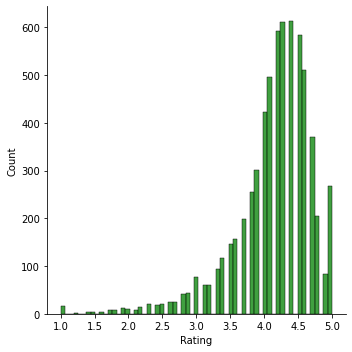

In [ ]:
sn.displot(df['Rating'], color='Green')
print('Skewness is',(df['Rating']).skew())
print(('The median and mean is ', df['Rating'].median(), df['Rating'].mean()))

# Skewness is -1.5691083719913386 and the Mean and Median is greater than the Mode

# Positive Skewness means when the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

# b. What is the implication of this on your analysis?
# This shape indicates that there are a number of data points, perhaps outliers, that are greater than the mode and most data falls to the right, or positive side, of the graph's peak.

# 6. What are the top Content Rating values?
# a. Are there any values with very few records?

In [ ]:
df['Content Rating'].value_counts()

Everyone           5350
Teen                625
Mature 17+          314
Everyone 10+        213
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# 2 values are having very few records
# b. If yes, drop those as they won’t help in the analysis

In [ ]:
R=df[(df['Content Rating']=='Adults only 18+') | (df['Content Rating']=='Unrated')]
df.drop(R.index, inplace=True)

In [ ]:
df['Content Rating'].value_counts()

Everyone        5350
Teen             625
Mature 17+       314
Everyone 10+     213
Name: Content Rating, dtype: int64

# 7. Effect of size on rating
# a. Make a joinplot to understand the effect of size on rating
# b. Do you see any patterns?
# c. How do you explain the pattern?

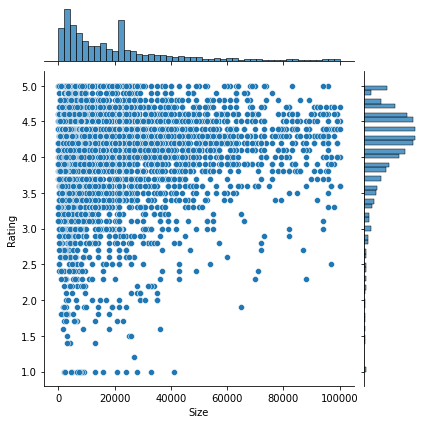

In [ ]:
sn.jointplot(data=df, x='Size',y='Rating',kind="scatter")

# In this plot we can analyse that as the size is increasing the rating of the App is also increasing, we can say that the more the size of an App a lot of features are added and so on.. so the Ratings are higher.

# **8. Effect of price on rating**
# a. Make a jointplot (with regression line)
# b. What pattern do you see?
# c. How do you explain the pattern?

# In this plot we can analyse that higher priced apps are very less used by people and there's a peak of rating at 4 - 4.5 which means that people have rated more on this range and as we can see on price 0 most of the people are there which says more apps are free of cost.

# d. Replot the data, this time with only records with price > 0
# e. Does the pattern change?
# f. What is your overall inference on the effect of price on the rating

In [ ]:
PR = df[df.Price>0]

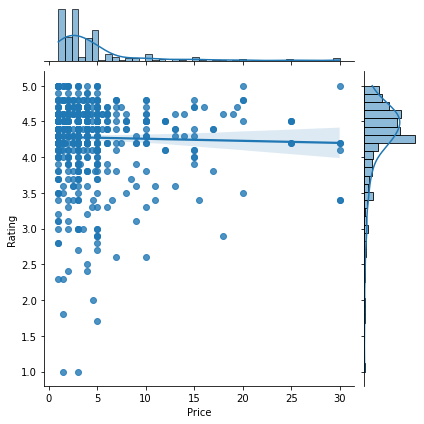

In [ ]:
sn.jointplot(data=PR, x='Price',y='Rating', kind="reg")

# Pattern is bit scattered and the rating range (4 - 4.5) is decreased and again most apps are of below 5 price for which people rated

# 9. Look at all the numeric interactions together –
# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

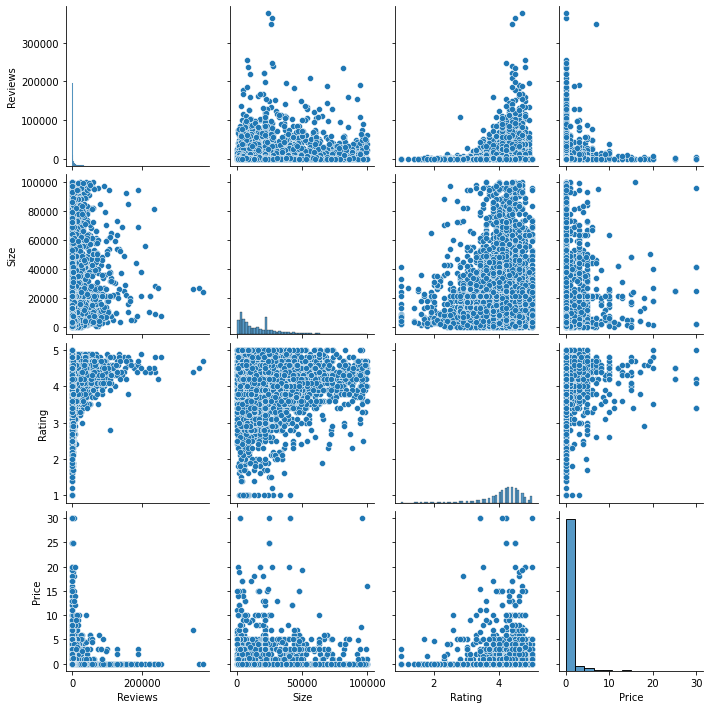

In [ ]:
P = df[[ 'Reviews', 'Size', 'Rating', 'Price']]
sn.pairplot(P)

# 10.Rating vs. content rating
# a. Make a bar plot displaying the rating for each content rating

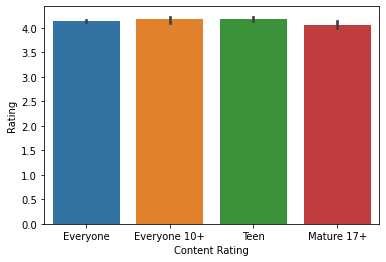

In [ ]:
sn.barplot(data=df, x='Content Rating', y='Rating')

# b. Which metric would you use? Mean? Median? Some other quantile?
# Since we removed the outliers we will use Mean metric.

In [ ]:
df.groupby(['Content Rating'])['Rating'].mean()

Content Rating
Everyone        4.137084
Everyone 10+    4.173239
Mature 17+      4.066561
Teen            4.181280
Name: Rating, dtype: float64

# 11. Content rating vs. size vs. rating – 3 variables at a time
# a. Create 5 buckets (20% records in each) based on Size

In [ ]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'],bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])

In [ ]:
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.130684,4.219444,3.967500,4.178041
20k-40k,4.147513,4.092771,4.144554,4.156667
40k-60k,4.121326,4.233333,4.209375,4.215278
60k-80k,4.198438,4.266667,4.181818,4.238095
80k-100k,4.188679,4.192308,4.280000,4.197143


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [ ]:
CRvsSB = pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', 
                     aggfunc=lambda x:np.percentile(x,20))

In [ ]:
CRvsSB

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.00,3.5,3.80
20k-40k,3.8,3.80,3.9,3.88
40k-60k,3.8,4.00,4.1,4.00
60k-80k,3.9,4.02,3.9,3.90
80k-100k,3.8,3.88,4.0,3.90


# c. Make a heatmap of this
# i. Annotated

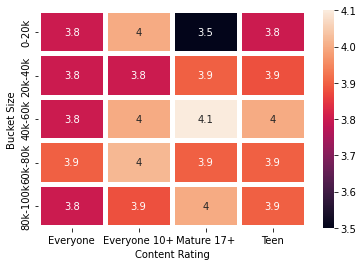

In [ ]:
sn.heatmap(CRvsSB,annot=True,linewidths=4)

# ii. Greens color map

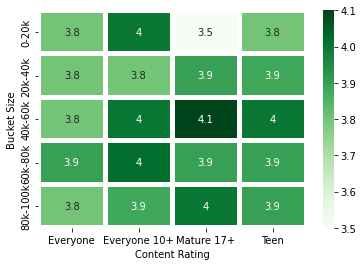

In [ ]:
sn.heatmap(CRvsSB,annot=True,linewidths=4,cmap="Greens")

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
# My inference is that there's nothing like lighter or heavier apps are prefered but heatmap shows that apps between 40k - 60k apps have good rating as compared to other size apps.